In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import dill

In [5]:
data = pd.read_csv('Admission_Predict.csv').set_index('Serial No.')
data = data.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'})

In [7]:
print('The dataset has {} rows.'.format(len(data)))
print('The dataset has {} columns'.format(data.columns))

The dataset has 400 rows.
The dataset has Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object') columns


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB
None


In [11]:
print(data.isnull().any())

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


None of the values have any Null values

Checking the correlation between all the features

<Axes: >

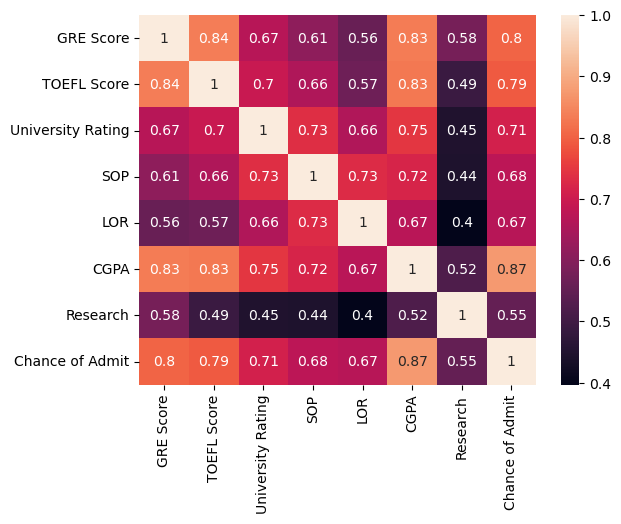

In [15]:
sns.heatmap(data.corr(), annot=True)

The Chance of Admit strongly correlates with CGPA, GRE Score and TOEFL Score. It has a weaker correlation with University Rating, SOP and LOR. The Research has the least correlation.

Let us look at individual features and their properties

The Research feature is a binary value and will not show any significant results in the PairPlot. It can be dropped

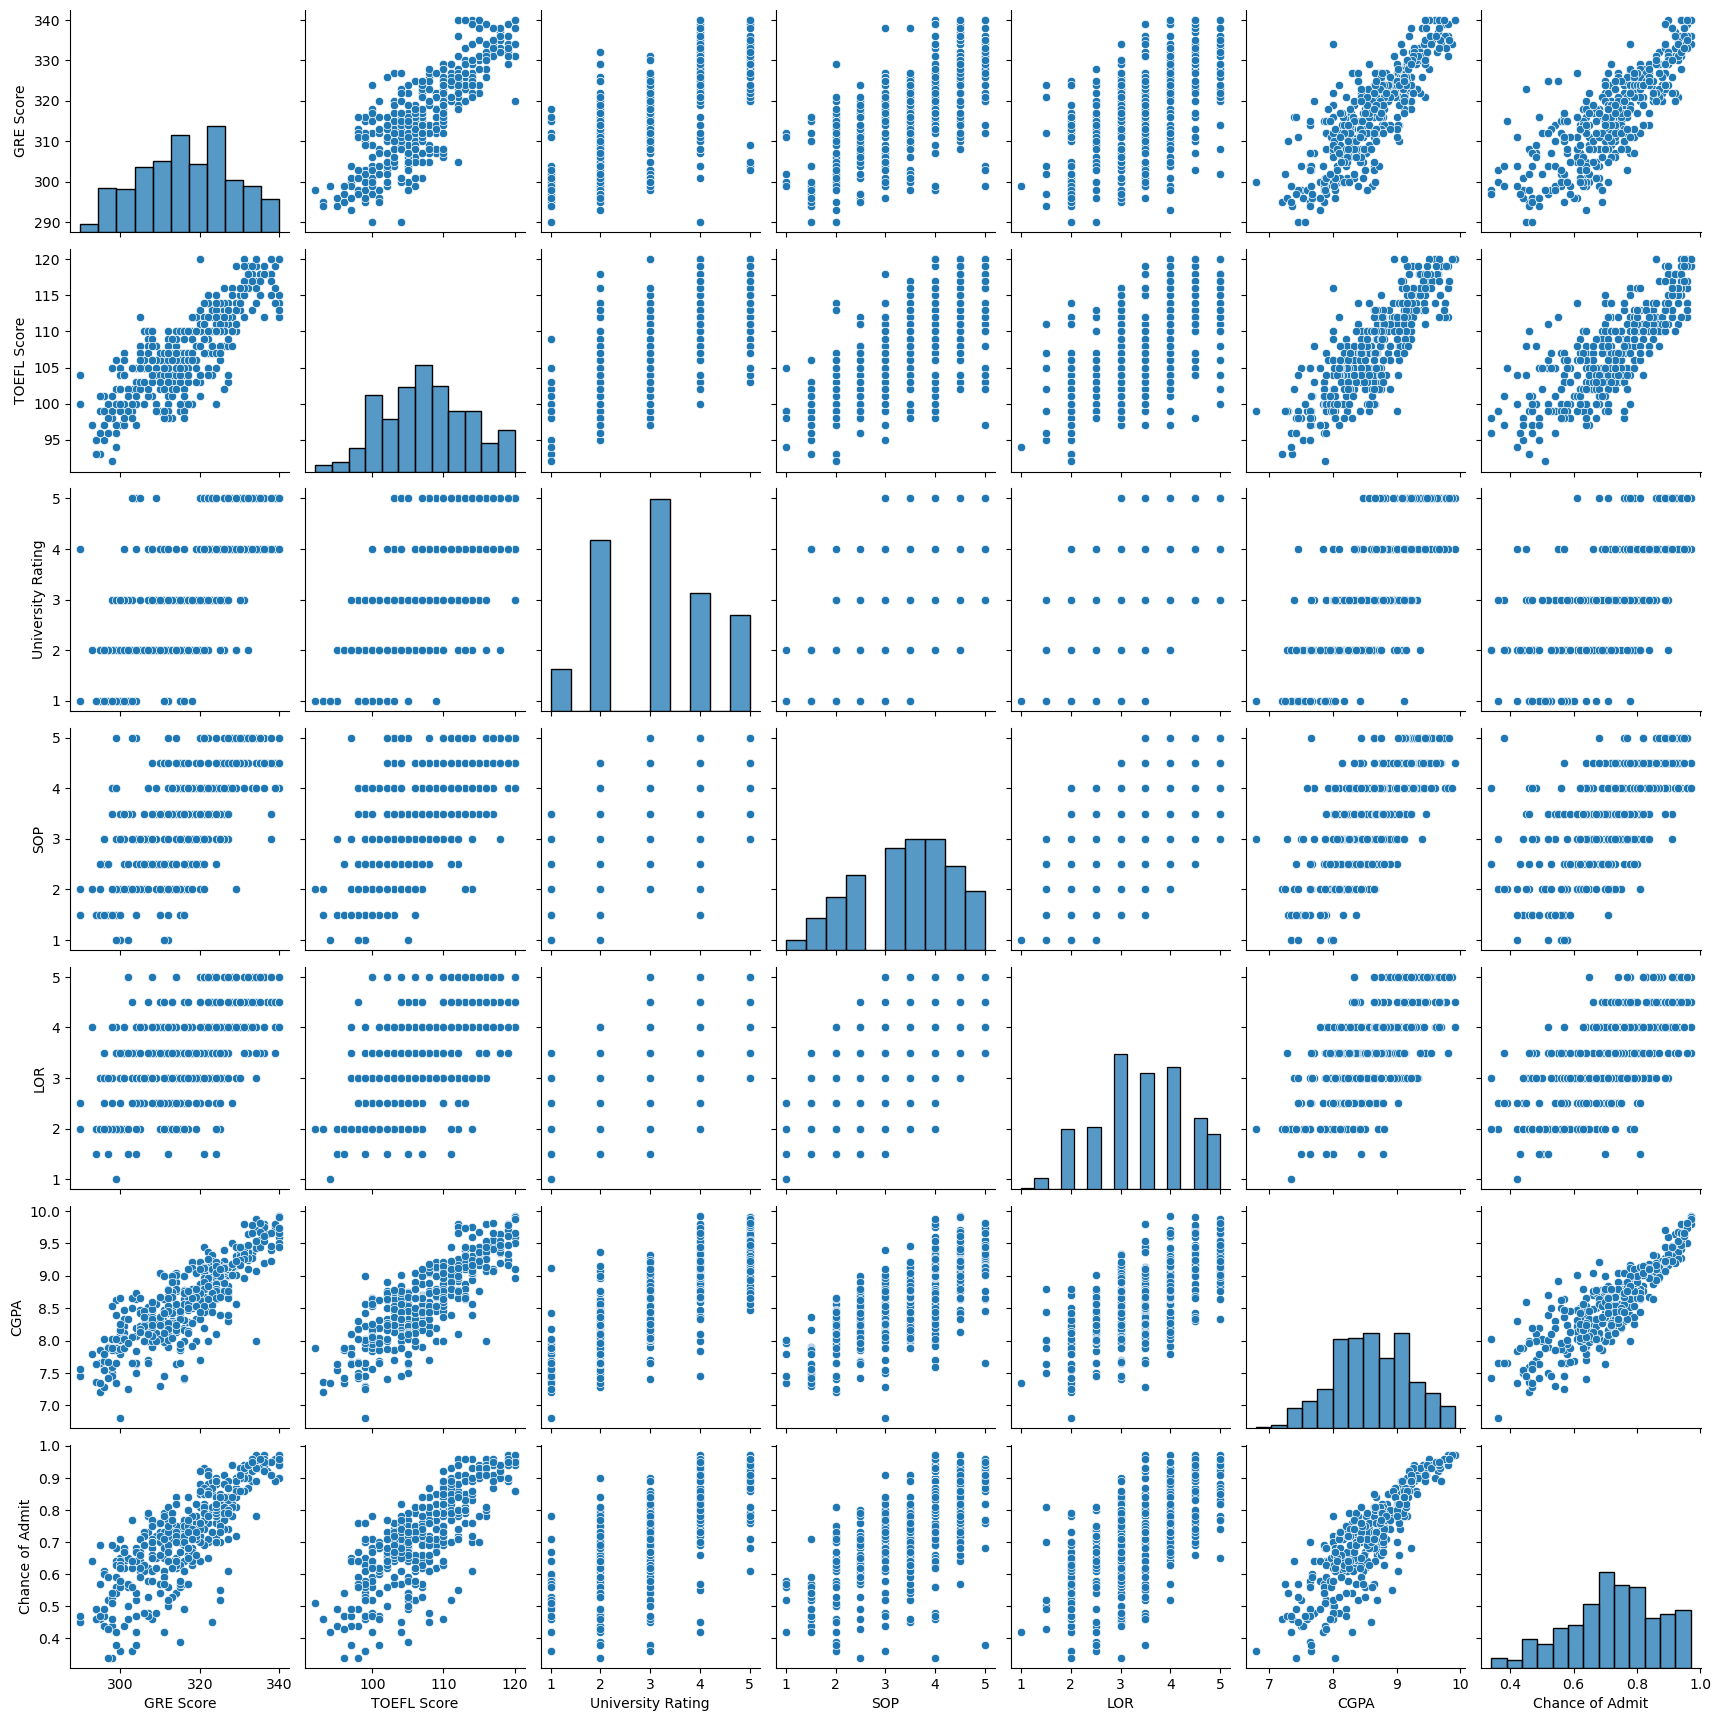

In [20]:
sns.pairplot(data.drop(columns='Research'))

The PairPlot gives a lot of information in one plot. Let us disect it by each feature.
    1. As GRE Score increases, the TOEFL Scores also increases and even the CGPA Score increases. This means that students who score good GRE Scores also score good TOEFL Scores and have better CGPAs.
    2. GRE Score has a distribution with a mean near 320 and majority of students score between 310 to 330 which is indicated by the peaks in the graph.
    3. Students from higher University Rating have higher GRE Scores, TOEFL Scores and CGPA.
    4. Students have better LOR and SOP rating when they are from higher rated universities.
    5. We can see a similar trend for relation between GRE Scores, TOEFL Scores, CGPA Scores, LOR Ratings and SOP Ratings. They all increases together, i.e., as students with better SOPs also tend to have better LORs, better GRE, TOEFL and CGPA Scores and are from higher rated universities and they have a higher chance of admit.

Splitting the data into training and testing set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Chance of Admit'), data['Chance of Admit'], test_size=0.2)

In [26]:
X_train.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,316.418750,107.396875,3.078125,3.415625,3.440625,8.593375,0.534375
std,11.514185,6.075955,1.162430,1.018207,0.892975,0.596179,0.499598
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.160000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


The ranges of all the features are very distinct and should be scaled correctly before making any predictions

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: U

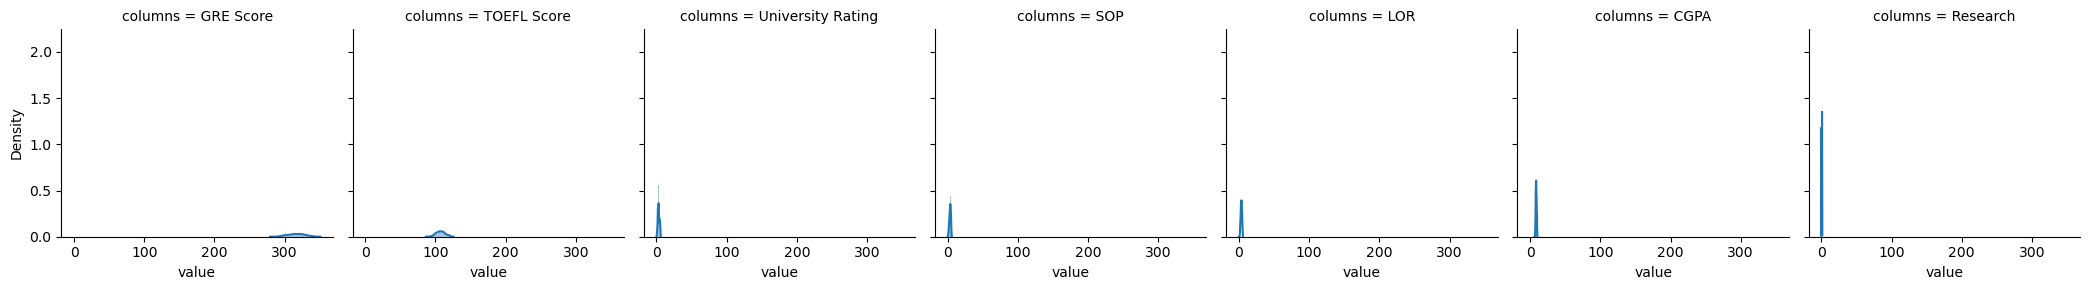

In [29]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

In [31]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:854: U

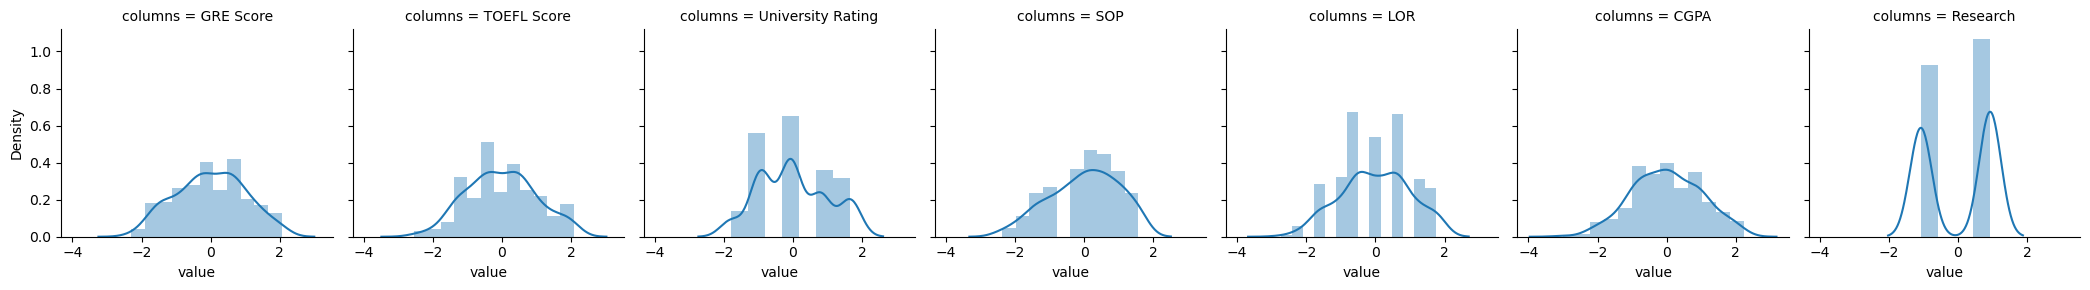

In [33]:
dfm = X_train.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')
g = (g.map(sns.distplot, 'value'))

We can see that all the values have 0 mean and have a normal distribution. This enables the model to make better predictions.

Creating a Grid Search for Random Forest Regressor

In [37]:
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,0.170227,0.001374,0.010708,0.000408,100,50,"{'max_depth': 100, 'n_estimators': 50}",0.740673,0.757774,0.793962,0.764136,0.022216
2,0.833084,0.000650,0.039994,0.001420,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.736677,0.751859,0.801041,0.763192,0.027472
3,1.001228,0.001009,0.046142,0.000558,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.733035,0.751446,0.799404,0.761295,0.027976
4,0.838921,0.006178,0.038226,0.000769,300,250,"{'max_depth': 300, 'n_estimators': 250}",0.737425,0.744622,0.800954,0.761000,0.028404
5,0.338106,0.003321,0.017471,0.000409,300,100,"{'max_depth': 300, 'n_estimators': 100}",0.734606,0.752445,0.792744,0.759932,0.024318
6,1.004537,0.003632,0.045667,0.000939,200,300,"{'max_depth': 200, 'n_estimators': 300}",0.730944,0.748472,0.798035,0.759151,0.028412
7,0.832957,0.001082,0.039001,0.000004,400,250,"{'max_depth': 400, 'n_estimators': 250}",0.729896,0.747995,0.799134,0.759008,0.029320
8,1.005045,0.000739,0.045001,0.000005,400,300,"{'max_depth': 400, 'n_estimators': 300}",0.732526,0.747909,0.795990,0.758808,0.027031
9,0.155943,0.019008,0.011633,0.000899,None,50,"{'max_depth': None, 'n_estimators': 50}",0.728405,0.747961,0.799416,0.758594,0.029949


Taking a look at the Grid Search results, we can see that the Random Forest Regressor with a maximum depth of 200 and 300 estimators gave the best results. But, when we look more closely, we can see that the regressor with maximum depth as None and number of estimators as 50 give almost the same result (difference is 0.001465) but takes less than half the time to make the predictions. If time is of concern, this model should be picked.

Because Random Forest is "random", the results and the inference above might change when this Notebook is run when making the commit.

Creating a pipeline

In [42]:
pipe = make_pipeline(scaler, gridsearch)

This pipeline can be used to deploy this model. It contains the complete model which scales the input data and runs it through the Random Forest to get a prediction.

Testing out the predictions of the pipeline and the model trained above.

In [46]:
print('Original model: ' + str(gridsearch.predict(X=scaler.transform(data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1)))[0]))
print('Pipeline model: ' + str(pipe.predict(X=data.drop(columns='Chance of Admit').iloc[0].values.reshape(1, -1))[0]))

Original model: 0.9434
Pipeline model: 0.9434


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predictions are the same. We can now export the pipeline.